In [1]:
from pyrootmemo.pullout import PulloutEmbeddedElastic, PulloutEmbeddedElasticSlipping
from pyrootmemo.pullout import PulloutEmbeddedElasticBreakage, PulloutEmbeddedElasticBreakageSlipping
from pyrootmemo.pullout import PulloutEmbeddedElastoplastic, PulloutEmbeddedElastoplasticSlipping
from pyrootmemo.pullout import PulloutEmbeddedElastoplasticBreakage, PulloutEmbeddedElastoplasticBreakageSlipping
from pyrootmemo.pullout import PulloutSurfaceElastic, PulloutSurfaceElasticSlipping
from pyrootmemo.pullout import PulloutSurfaceElasticBreakage, PulloutSurfaceElasticBreakageSlipping
from pyrootmemo.pullout import PulloutSurfaceElastoplastic, PulloutSurfaceElastoplasticSlipping
from pyrootmemo.materials import MultipleRoots, Interface
from pyrootmemo.tools.helpers import units
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generate some root data
from collections import namedtuple
Parameter = namedtuple("parameter", "value unit")
roots = MultipleRoots(
    species = "test_species",
    diameter = Parameter([1, 6, 3], 'mm'),
    yield_strength = Parameter([25, 10, 5], 'MPa'),
    tensile_strength = Parameter([30, 20, 10], 'MPa'),
    elastic_modulus = Parameter([100, 20, 100], 'MPa'),
    plastic_modulus = Parameter([100, 10, 50], 'MPa'),
    unload_modulus = Parameter([100, 20, 100], 'MPa'),
    length = Parameter([1, 1, 0.01], 'm'),
    length_surface = Parameter([0.1, 0.1, 0.001], 'm')
)
# interface data
interface = Interface(shear_strength = Parameter(10, "kPa"))
# Weibull shape parameter
weibull_shape = 20 

In [3]:
#p = Pullout_base(roots, soil_resistance)
#print(p.roots.xsection)

p0 = PulloutEmbeddedElastic(roots, interface)
p1 = PulloutEmbeddedElasticSlipping(roots, interface)
p2 = PulloutEmbeddedElasticBreakage(roots, interface)
p3 = PulloutEmbeddedElasticBreakageSlipping(roots, interface)
p4 = PulloutEmbeddedElastoplastic(roots, interface)
p5 = PulloutEmbeddedElastoplasticSlipping(roots, interface)
p6 = PulloutEmbeddedElastoplasticBreakage(roots, interface, weibull_shape = weibull_shape)
p7 = PulloutEmbeddedElastoplasticBreakageSlipping(roots, interface, weibull_shape = weibull_shape)

p = p4
#print(p.behaviour_types)
#print(p.limits[0])
#print(p.limits[1])
print(p.coefficients[0])
print(p.coefficients[1])
print(p.coefficients[2])
if False:
    disp = np.linspace(0, 250, 10) * units('mm')
    res = [p.force(d, jac = True) for d in disp]
    reinf_all = np.array([i[0] for i in res])
    reinf = reinf_all.sum(axis = 1)
    reinf = reinf_all[:, 0]
    plt.plot(disp, reinf)
    print(reinf)



#disp = 20.0 * units['mm']
#out = p.force(disp, jac = True)
#print(out)
#print(out[1])
#f,df,S,b = p.calculate(disp)
#print(f)
#print(S)
#print(b)

#p.plot(displacement_max = 300 * units['mm'])

[[0.0 0.0002026423672846755 0.0002026423672846755] [0.0 4.6907955389971185e-06 9.381591077994237e-06] [0.0 7.505272862395389e-06 1.5010545724790778e-05]] meter / newton ** 2
[[0.0 0.0 0.0] [0.0 0.0 -0.0026525823848649226] [0.0 0.0 -0.0005305164769729845]] meter / newton
[[0.0 0.0 0.0] [0.0 0.0 0.375] [0.0 0.0 0.009375]] meter


In [4]:
# SURFACE ROOTS
roots.length_surface = 0.01 * roots.length
p0 = PulloutSurfaceElastic(roots, interface)
p1 = PulloutSurfaceElasticSlipping(roots, interface)
p2 = PulloutSurfaceElasticBreakage(roots, interface)
p3 = PulloutSurfaceElasticBreakageSlipping(roots, interface, weibull_shape = 4.0)
p4 = PulloutSurfaceElastoplastic(roots, interface)
p5 = PulloutSurfaceElastoplasticSlipping(roots, interface)

p = p5
print(p.coefficients)
#print(p.behaviour_types)
#print(p.force(150 * units['mm'], jac = True))


DimensionalityError: Cannot convert from 'megapascal * millimeter ** 2' ([mass] * [length] / [time] ** 2) to 'millimeter * kilopascal * meter ** 2' ([length] ** 2 * [mass] / [time] ** 2)

[-2.0 -1.96 -1.92 -1.88 -1.84 -1.8 -1.76 -1.72 -1.68 -1.6400000000000001 -1.6 -1.56 -1.52 -1.48 -1.44 -1.4 -1.3599999999999999 -1.3199999999999998 -1.28 -1.24 -1.2 -1.1600000000000001 -1.12 -1.08 -1.04 -1.0 -0.96 -0.9199999999999999 -0.8799999999999999 -0.8400000000000001 -0.8 -0.76 -0.72 -0.6799999999999999 -0.6399999999999999 -0.5999999999999999 -0.56 -0.52 -0.48 -0.43999999999999995 -0.3999999999999999 -0.3599999999999999 -0.32000000000000006 -0.28 -0.24 -0.19999999999999996 -0.15999999999999992 -0.11999999999999988 -0.08000000000000007 -0.040000000000000036 0.0 0.040000000000000036 0.08000000000000007 0.1200000000000001 0.16000000000000014 0.20000000000000018 0.2400000000000002 0.28000000000000025 0.31999999999999984 0.3599999999999999 0.3999999999999999 0.43999999999999995 0.48 0.52 0.56 0.6000000000000001 0.6400000000000001 0.6800000000000002 0.7200000000000002 0.7600000000000002 0.8000000000000003 0.8399999999999999 0.8799999999999999 0.9199999999999999 0.96 1.0 1.04 1.08 1.12 1

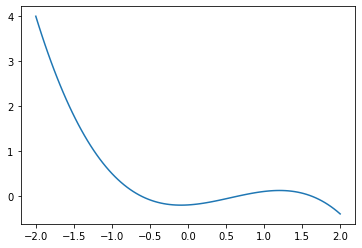

In [ ]:
a = np.array([-0.3]) * units('m/N^3')
b = np.array([0.5]) * units('m/N^2')
c = np.array([0.1]) * units('m/N')
d = np.array([-0.2]) * units('m')
x = np.linspace(-2, 2, 101) * units('N')
y = a*x**3 + b*x**2 + c*x + d
import matplotlib.pyplot as plt
plt.plot(x.magnitude, y.magnitude)
print(x)
print(y)
#print(P._solve_cubic(a, b, c, d))


In [ ]:
np.random.seed(0)
a = np.random.rand(5, 4)
print(a)
print(np.maximum.accumulate(a, axis = 1))

print(np.array([True, False, False])[[1,2,2,2,2,2,1]])

[[0.5488135  0.71518937 0.60276338 0.54488318]
 [0.4236548  0.64589411 0.43758721 0.891773  ]
 [0.96366276 0.38344152 0.79172504 0.52889492]
 [0.56804456 0.92559664 0.07103606 0.0871293 ]
 [0.0202184  0.83261985 0.77815675 0.87001215]]
[[0.5488135  0.71518937 0.71518937 0.71518937]
 [0.4236548  0.64589411 0.64589411 0.891773  ]
 [0.96366276 0.96366276 0.96366276 0.96366276]
 [0.56804456 0.92559664 0.92559664 0.92559664]
 [0.0202184  0.83261985 0.83261985 0.87001215]]
[False False False False False False False]
